# Predicting car prices by machine learning 

In this project, I am exploring the fundamentals of machine learning using the k-nearest neighbours algorithm to predict a car's market price using its attributes such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. This project was completed at the end of an [Introduction to Machine Learning](https://www.dataquest.io/course/machine-learning-fundamentals/) course on Dataquest.io.

The dataset that will be used for this project contains technical information for each car as well as the price of each car. More information about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/automobile)

Let's get started.


## Import and Preview dataset

In [1]:
import pandas as pd
import numpy as np 

cars = pd.read_csv('imports-85.data')

In [2]:
cars.head(3)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


In [3]:
cars.columns

Index(['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', '88.60', '168.80', '64.10', '48.80', '2548', 'dohc', 'four',
       '130', 'mpfi', '3.47', '2.68', '9.00', '111', '5000', '21', '27',
       '13495'],
      dtype='object')

The titles in the columns are not consistent with the columns information available on the [link](https://archive.ics.uci.edu/ml/datasets/automobile). Let's change the name of the columns as per the information available on the link.  

In [4]:
# reading the dataset with options in pd.read_csv 
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)
#Change display settings to ensure no columns are hidden when printed
pd.options.display.max_columns = 99
#Printing first 5 rows to ensure the column names
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Handle missing/incorrect information

### Incorrect values

In order to deploy predictive modelling on any dataset, ensure that the dataset does not contain any missing/incorrect information. The preview shows that there is some missing data in the column 'normalized-masses' as some entries are in '?' format. Lets change any incorrect value to NaN.
I can check the datatypes of all the columns in order to get a sense of missing/incorrect information. A column will register as containing float data if all the values in the column are integer/float values.If any other datatype is present in the column, it will be registered as a 'object' data type. 

The columns that should contain numerical, continuous values are then isolated into a new dataframe for cleaning and conversion to the float data type. 

Find missing values in numeric columns and rescale all the values in numeric columns from 0 to 1. 

In [5]:
# check data types of each column
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [6]:
# Select only the columns with continuous values from - https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 
                          'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
                          'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 
                          'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

In [7]:
numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


The columns in new dataframe have some missing values which need to be cleaned before I proceed further with modelling.

In [8]:
numeric_cars= numeric_cars.replace("?", np.nan)

After checking for missing values, few columns need to be converted into numerical datatypes such as int or float. 

In [9]:
# Convert all numeric column that contained '?' from object to float type
numeric_cars = numeric_cars.astype(float)

In [10]:
# Print datatype to confirm change
numeric_cars.dtypes

normalized-losses    float64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-size          float64
bore                 float64
stroke               float64
compression-rate     float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object

### Missing information
Now that all values in the cars_numeric dataset are of the correct data type, let's find number of missing values in all columns. All missing info was replaced by NaN, so we can now check for missing data by counting the number of null values.

In [11]:
# Check number of null values
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [12]:
# Because our target column for prediction is 'price'. Let's remove all those rows with missing values.
numeric_cars = numeric_cars.dropna(subset = ["price"])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

### Fill missing values
To avoid losing all information in the rows that contain certain missing values, the missing values will be replaced with the column means.

In [13]:
# Fill all the missing values with mean values of that column. 
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [14]:
# Confirm that there are no missing values
print(numeric_cars.isnull().sum())
print(numeric_cars.shape)

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64
(201, 15)


After cleaning the dataset there are 201 rows in the dataset with no missing information.

### Normalization

Every column in the cleaned dataset contain values of different unites. To make comparison among different features on the same scale, the data must be normalized to a scale between 0 and 1. 

In [15]:
# Normalize the numeric values from 0 to 1 except the target column 
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars["price"] = price_col

In [16]:
numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## K-Nearest Neighbours Model

The dataframe is now ready for machine learning model. Let's start with univariate model to practice the workflow using a simple scenario. 

### Univariate Model

The KNeighboursRegressor predicts the target values by learning based on on the k nearest neighbours of each query point. The code block below trains the model to predict the price based only on one column at a time. The resulting root mean square error for the predictions made using each of the those columns is then calculated and assigned to a dictionary with the key being the column that was used to train the model. 

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# KNearestNeighbours function using default number of neighbours(5)
def knn_train_test(df, train_col, target_col):
    knn = KNeighborsRegressor()
    
    #randomize sets
    np.random.seed(1)
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)
    
    half_point = int(len(random_df)/2)
    
    #split the dataset into train and test sets
    train_df = random_df.iloc[0:half_point]
    test_df = random_df.iloc[half_point:]
    
    #training knn on train columns    
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    #Predict using trained model
    predictions = knn.predict(test_df[[train_col]])
    
    # Calculate RMSE
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse

rmse_values = {}
train_cols = numeric_cars.columns.drop('price')

# For each column in train_cols, train a model, return the RMSE value
# and add to the dictionary "rmse_results".
for cols in train_cols:
    rmse = knn_train_test(numeric_cars, cols, 'price')
    rmse_values[cols] = rmse
    
rmse_values

{'normalized-losses': 7330.197653434445,
 'wheel-base': 5461.553997873057,
 'length': 5427.2009608367125,
 'width': 4704.482589704386,
 'height': 8144.441042663747,
 'curb-weight': 4401.118254793124,
 'engine-size': 3238.4628296477176,
 'bore': 6780.627784685976,
 'stroke': 8006.529544647101,
 'compression-rate': 6610.812153159129,
 'horsepower': 4037.0377131537603,
 'peak-rpm': 7697.4596964334805,
 'city-mpg': 4766.422505090134,
 'highway-mpg': 4630.026798588056}

In [18]:
# Sorting the dictionary key values for better interpretation
rmse_values_series = pd.Series(rmse_values)
rmse_values_series.sort_values()


engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

Now we will modify the function to accept the parameter for k value instead of just the default value of k as 5

In [19]:
# KNearestNeighbours function using specified number of neighbours
def knn_train_test(df, train_col, target_col):
    #randomize sets
    np.random.seed(1)
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)
    
    half_point = int(len(random_df)/2)
    
    #split the dataset into train and test sets
    train_df = random_df.iloc[0:half_point]
    test_df = random_df.iloc[half_point:]
    
    k_values = [1, 3, 5, 7, 9]
    k_rmses = {}
    
    # Calculate RMSEs for each k
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors = k)
        
        #training knn on train columns    
        knn.fit(train_df[[train_col]], train_df[target_col])
    
        #Predict using trained model
        predictions = knn.predict(test_df[[train_col]])
    
        # Calculate RMSE
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    
    return k_rmses

k_rmse_values = {}
train_cols = numeric_cars.columns.drop('price')

# For each column in train_cols, train a model, return the RMSE value
# and add to the dictionary "rmse_results".
for cols in train_cols:
    k_rmse = knn_train_test(numeric_cars, cols, 'price')
    k_rmse_values[cols] = k_rmse
    
k_rmse_values

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,


It is difficult this way to process the information. Plot a lineplot to understand these results.

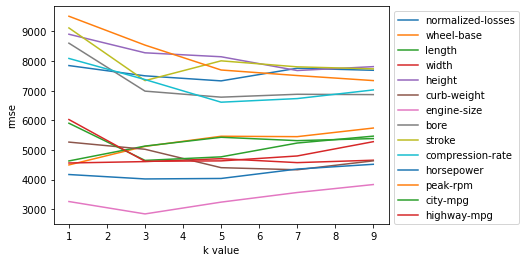

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

# List for legend
leg = []

# Plot RMSE for each value of k for models trained on each column
for k, v in k_rmse_values.items():
    x = list(v.keys())
    y = list(v.values())
    leg.append(k)
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('rmse')
    
plt.legend(leg, bbox_to_anchor = (1,1))
plt.show()
    

### Results of Univariate Model

The avergae values of rmses across different k values used in univariate model above is calculated in the following cells. The values are then sorted in ascending order to identify which features were the best predictors of price using a univariate model.


In [21]:
# Compute RMSEs for different k values
feature_avg_rmse = {}
for k, v in k_rmse_values.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
    
# Display best features sorted avg RMSE values
series_avg_values = pd.Series(feature_avg_rmse)
series_avg_values.sort_values()

engine-size          3346.484586
horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

## Multivariate Model

Multivariate model is implemented with similar procedure used above that uses 2 to 6 best features to determine the optimum number of features to use.

To begin, the multivariate model is first run with k = 5 and then modified to run for k values from 1 to 25. 


In [29]:
# Multivariate KNearestNeighbours function using specified number of neighbours
def knn_train_test_multi(df, train_col, target_col):
    #randomize sets
    np.random.seed(1)
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)
    
    half_point = int(len(random_df)/2)
    
    #split the dataset into train and test sets
    train_df = random_df.iloc[0:half_point]
    test_df = random_df.iloc[half_point:]
    
    k_values = [5]
    k_rmses = {}
    
    # Calculate RMSEs for each k
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors = k)
        
        #training knn on train columns    
        knn.fit(train_df[train_col], train_df[target_col])
    
        #Predict using trained model
        predictions = knn.predict(test_df[train_col])
    
        # Calculate RMSE
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        
        k_rmses[str(k) + 'Neighbors'] = rmse
    
    return k_rmses

#Dictionary of RMSE values for each set of features and each number of neighbours
k_rmse_values = {}

two_best_features = ['horsepower', 'width']
rmse = knn_train_test_multi(numeric_cars, two_best_features,'price')
k_rmse_values["two_best_features"] = rmse

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse = knn_train_test_multi(numeric_cars, three_best_features, 'price')
k_rmse_values["three best features"] = rmse

four_best_features = ['horsepower', 'width', 'curb-weight', 
                     'highway-mpg']
rmse = knn_train_test_multi(numeric_cars, four_best_features, 'price')
k_rmse_values["four best features"] = rmse

five_best_features = ['horsepower', 'width', 'curb-weight', 
                     'highway-mpg', 'length']
rmse = knn_train_test_multi(numeric_cars, five_best_features, 'price')
k_rmse_values["five best features"] = rmse

six_best_features = ['horsepower', 'width', 'curb-weight', 
                     'highway-mpg', 'length', 'city-mpg']
rmse = knn_train_test_multi(numeric_cars, six_best_features, 'price')
k_rmse_values["six best features"] = rmse

k_rmse_values



{'two_best_features': {'5Neighbors': 3589.3132622073304},
 'three best features': {'5Neighbors': 3305.9401397969677},
 'four best features': {'5Neighbors': 3358.6915801682458},
 'five best features': {'5Neighbors': 3665.546673045813},
 'six best features': {'5Neighbors': 3628.261188214127}}

### k values ranging from 1 to 26

In [35]:
# Multivariate KNearestNeighbours function using specified number of neighbours
def knn_train_test_multi(df, train_col, target_col):
    #randomize sets
    np.random.seed(1)
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)
    
    half_point = int(len(random_df)/2)
    
    #split the dataset into train and test sets
    train_df = random_df.iloc[0:half_point]
    test_df = random_df.iloc[half_point:]
    
    k_values = [i for i in range(1, 26)]
    k_rmses = {}
    
    # Calculate RMSEs for each k
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors = k)
        
        #training knn on train columns    
        knn.fit(train_df[train_col], train_df[target_col])
    
        #Predict using trained model
        predictions = knn.predict(test_df[train_col])
    
        # Calculate RMSE
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    
    return k_rmses

#Dictionary of RMSE values for each set of features and each number of neighbours
k_rmse_values = {}

two_best_features = ['horsepower', 'width']
rmse = knn_train_test_multi(numeric_cars, two_best_features,'price')
k_rmse_values["two best features"] = rmse

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse = knn_train_test_multi(numeric_cars, three_best_features, 'price')
k_rmse_values["three best features"] = rmse

four_best_features = ['horsepower', 'width', 'curb-weight', 
                     'highway-mpg']
rmse = knn_train_test_multi(numeric_cars, four_best_features, 'price')
k_rmse_values["four best features"] = rmse

k_rmse_values


{'two best features': {1: 4061.9613050304106,
  2: 3497.49936199118,
  3: 3402.8692636542114,
  4: 3587.0044198356923,
  5: 3589.3132622073304,
  6: 3680.062981095498,
  7: 3756.92796407086,
  8: 3937.770418264052,
  9: 4078.3485919700097,
  10: 4163.828373808731,
  11: 4297.135962941241,
  12: 4370.753019740529,
  13: 4500.462028689254,
  14: 4604.156707686779,
  15: 4595.345097101211,
  16: 4605.433669910023,
  17: 4611.2845838376215,
  18: 4598.88218482117,
  19: 4579.964891966457,
  20: 4653.966845712387,
  21: 4759.076059393234,
  22: 4807.805949321809,
  23: 4865.320887129985,
  24: 4910.715769042787,
  25: 4921.936353813013},
 'three best features': {1: 3013.0109985241875,
  2: 2813.285969825997,
  3: 3171.585284478674,
  4: 3182.3137417981943,
  5: 3305.9401397969677,
  6: 3522.506848900376,
  7: 3774.3772094554106,
  8: 3978.969124021116,
  9: 3992.923680588881,
  10: 4076.2381473803043,
  11: 4156.388331131807,
  12: 4201.10713385948,
  13: 4303.62676861325,
  14: 4359.693296

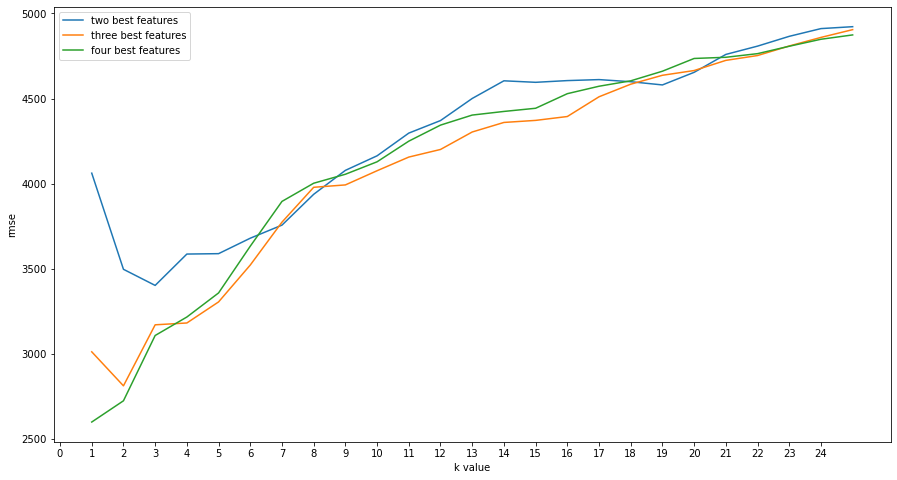

In [36]:
# List to be used for legend
leg = []

# Create figure wide enough to see the observation clearly
ax  = plt.figure(figsize = (15,8))
for k, v in k_rmse_values.items():
    x = list(v.keys())
    y = list(v.values())
    # add current number of features to append
    leg.append(k)
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('rmse')
    plt.xticks(np.arange(0,25,1))
    
plt.legend(leg)
plt.show()

### Results of multivariate model

The multivariate model resulted in lower RMSE values than the univariate model for an optimum number of neighbors.
Using too many neighbors caused an increase in RMSE values which is not desirable. This increase in RMSE values is likely due to underfiiting because when the k value is large, the distribution is smoothed-out. 

## Conclusion

The K-NearestNeighbors algorithm has been applied to predict the car sale prices using univariate and multivariate models and most successful predictors of sale prices for both models are given below:

#### Univariate Model

| **Features** | **RMSE** |
|--------------|--------|
|engine-size   |3346    |
|horsepower    |4219    |
|width         |4618    |
|curb-weight   |4730    |
|highway-mpg   |5069    |

#### Multivariate Model

Signifcant improvements were seen in the multivariate model for low number of k. The RMSE value achieved when using the best two, three, and four features for k values between 1 and 3 are shown in the table below

| **Number of Features** | **RMSE(k=1)** |**RMSE(k=2)** |**RMSE(k=3)** |
|------------------------|---------------|--------------|--------------|
|Two                     |4061           |3497          |3402          |
|Three                   |3013           |2813          |3171          |
|Four                    |2600           |2725          |3108          |

The results in the tables above indicate that the best prediction for car prices can be achieved using the four best price predictors (horsepower, width, curb-weight and highway mpg) with 1 neighbour. 